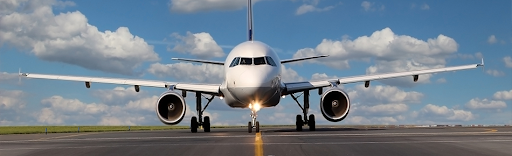

# Portfolio Diversification Needed: Corporate and Private Aviation
***

## Final Project Submission

* Student name: __[Liam Hudson](https://www.linkedin.com/in/liamhud-son)__
* Student pace: Self-Paced
* Scheduled project review date/time: 
* Instructor name: Mark Barbour
* Blog post URL:


## Overview
***

This project investigates civil aviation accident data between 1962 to 2023 from the __[National Transportation Safety Board](https://www.ntsb.gov/Pages/home.aspx)__ (NTSB). The primary goal is to find the safest aircrafts. The variables I will focusing on throughout this project are number of engines, injury severity, and flight phase, while considering weather conditions and engine type.

## Business Understanding
***

My business wants to diversify its portfolio into new industries. I am tasked with investigating the aviation industry and suggesting three aircrafts that pose the least amount of risk. I will base my decisions off of the injury severity of each accident (to determine the overall safety of the aircraft), the number of engines that the aircraft has, as well as which phase of the flight the accident occurred in. My business will use these suggestions to purchase and operate these airplanes for commercial and private enterprises.

## Data Understanding
***

The National Transportation Safety Board has a very detailed dataset that records all civil aviation accidents from 1962 all the way to 2023. The data takes many variables into consdieration, like engine type, weather conditions, total injuries (i.e., minor, severe, fatal, and/or uninjured), and if the aircraft was amateur built or not. With each accident record, a make and model of the plane is recorded.

## Data Preparation
***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

After importing the necessary libraries, it's time to check out the first couples records of the dataset.

In [2]:
accidents = pd.read_csv('Aviation_Data.csv', low_memory = False)

In [3]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

Since this dataset has a fairly large size of 90,348 rows and 31 columns. I am going to drop the columns and rows that are not going to be relevant to my investigation/have a large null value count.

In [4]:
accidents.drop(['Event.Id',
                'Investigation.Type',
                'Accident.Number',
                'Event.Date',
                'Latitude', 
                'Longitude', 
                'Airport.Code', 
                'Airport.Name', 
                'Aircraft.Category', 
                'Registration.Number', 
                'FAR.Description', 
                'Schedule', 
                'Air.carrier',
                'Broad.phase.of.flight',
                'Weather.Condition',
                'Publication.Date'], 
                 axis = 1, inplace = True)
accidents.dropna(subset = ['Injury.Severity', 
                           'Number.of.Engines', 
                           'Engine.Type',
                           'Make',
                           'Model'], 
                            axis = 0, inplace = True)
accidents.head()

,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status
0,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Probable Cause
1,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,Probable Cause
2,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,Probable Cause
3,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Probable Cause
5,"BOSTON, MA",United States,Non-Fatal,Substantial,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,NaN,NaN,NaN,1.0,44.0,Probable Cause


Much better. I also want to see if any of the columns I'm focusing on have values, like "unknown" or "invalid," instead of NULL.

In [5]:
accidents['Engine.Type'].value_counts()

Engine.Type
Reciprocating      68969
Turbo Shaft         3528
Turbo Prop          3311
Turbo Fan           2288
Unknown              770
Turbo Jet            690
Electric               7
LR                     2
NONE                   2
Hybrid Rocket          1
Geared Turbofan        1
UNK                    1
Name: count, dtype: int64

Looks like the 'Engine.Type' column has some records with a 'NONE' value, 'Unknown' value, and 'UNK' value. I am going to replace these values with NULL and then drop them, accordingly.

In [6]:
accidents['Engine.Type'].replace(['Unknown', 'UNK', 'NONE'], pd.NA, inplace = True)

/var/folders/0y/79r5lggs18d69s42s6p76mrw0000gn/T/ipykernel_10545/1189670351.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  accidents['Engine.Type'].replace(['Unknown', 'UNK', 'NONE'], pd.NA, inplace = True)


In [7]:
accidents['Engine.Type'].dropna(axis = 0, inplace = True)
accidents['Engine.Type'].value_counts()

Engine.Type
Reciprocating      68969
Turbo Shaft         3528
Turbo Prop          3311
Turbo Fan           2288
Turbo Jet            690
Electric               7
LR                     2
Hybrid Rocket          1
Geared Turbofan        1
Name: count, dtype: int64

The variables that I am choosing to focus on within the dataset are the makes/models of each airplane, injury severity of the accident, and engine count/type.

First, I will find out which make of aircrafts got into the most and least accidents, according to their frequency in the dataset.

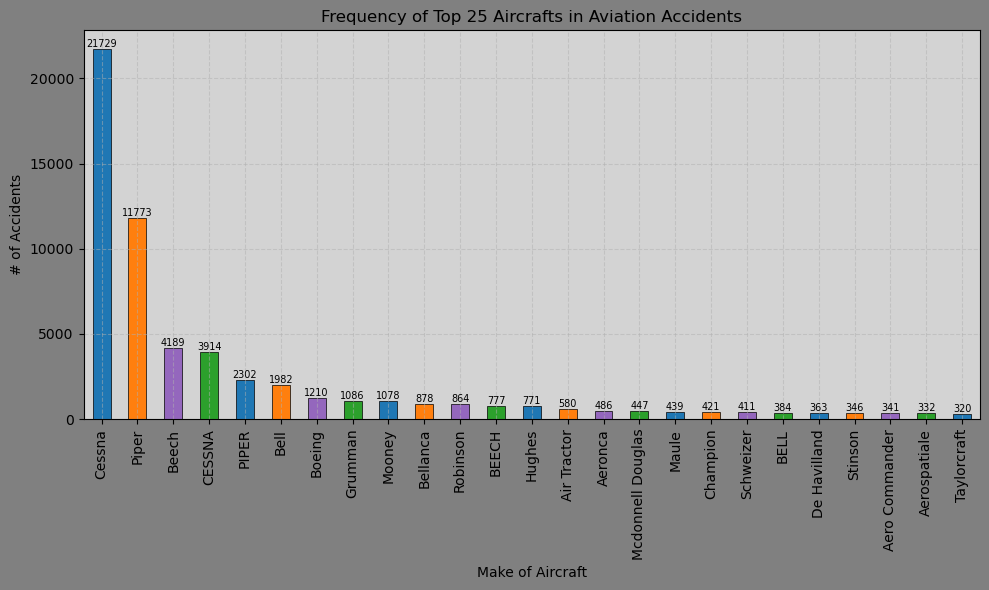

In [9]:
make_frequency = accidents['Make'].value_counts().head(25)

fig, ax = plt.subplots(figsize = (10, 6))
make_frequency.plot(kind = 'bar', 
                    color = ['tab:blue', 'tab:orange', 'tab:purple', 'tab:green'], 
                    edgecolor = 'k', 
                    linewidth = 0.5, 
                    ax = ax)

fig.set_facecolor('grey')
ax.set_facecolor('lightgrey')

ax.set_xlabel('Make of Aircraft')
ax.set_ylabel('# of Accidents')
ax.set_title('Frequency of Top 25 Aircrafts in Aviation Accidents')
ax.set_xticklabels(make_frequency.index, rotation = 90)
plt.grid(True, linestyle = '--', alpha = 0.5)

for count in ax.containers:
    labels = ax.bar_label(count, label_type ='edge', fontsize = 7)

plt.tight_layout()
plt.show()

It looks like Cessna and Piper are the two makes of aircraft that got into the most recorded accidents by a significant amount.

I'm curious to see the same distribution for different types of engines.

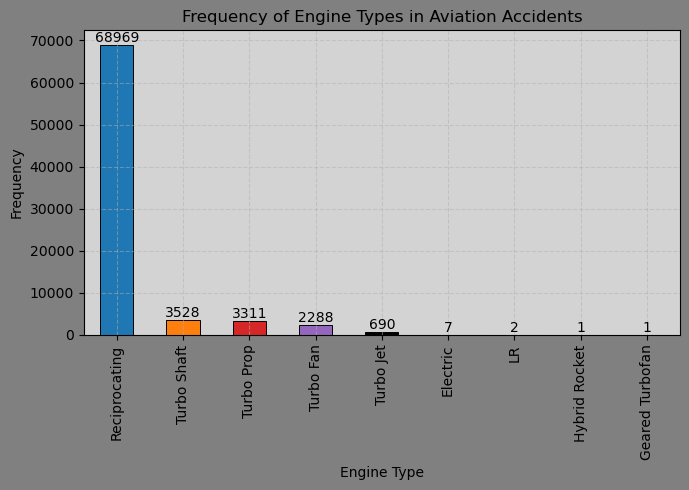

In [11]:
engine_type_frequency = accidents['Engine.Type'].value_counts()

fig, ax = plt.subplots(figsize = (7, 5))
engine_type_frequency.plot(kind = 'bar', 
                    color = ['tab:blue', 'tab:orange', 'tab:red', 'tab:purple', 'k'], 
                    edgecolor = 'k', 
                    linewidth = 0.7, 
                    ax = ax)

fig.set_facecolor('grey')
ax.set_facecolor('lightgrey')

ax.set_xlabel('Engine Type')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Engine Types in Aviation Accidents')
ax.set_xticklabels(engine_type_frequency.index, rotation = 90)
plt.grid(True, linestyle = '--', alpha = 0.5)

for count in ax.containers:
    labels = ax.bar_label(count, label_type ='edge', fontsize = 10)

plt.tight_layout()
plt.show()

Reciprocating engines got into the most accidents by a long shot. It definitely seems like they aren't the safest option when it comes to operating an aircraft.

I want to see how many total reciprocating engines each aircraft had.

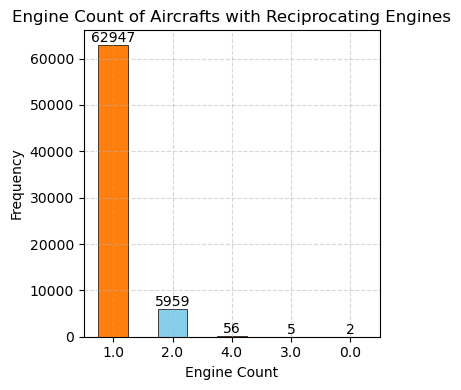

In [12]:
reciprocating = accidents[accidents['Engine.Type'] == 'Reciprocating']

reciprocating_count = reciprocating['Number.of.Engines'].value_counts()

fig, ax = plt.subplots(figsize = (4, 4))

reciprocating_count.plot(kind = 'bar',
                         color = ['tab:orange', 'skyblue'],
                         edgecolor = 'k',
                         linewidth = 0.5,
                         ax = ax)

ax.set_xlabel('Engine Count')
ax.set_ylabel('Frequency')
ax.set_title('Engine Count of Aircrafts with Reciprocating Engines')
ax.set_xticklabels(reciprocating_count.index, rotation = 360)
plt.grid(True, linestyle = '--', alpha = 0.5)

for count in ax.containers:
    labels = ax.bar_label(count, label_type ='edge', fontsize = 10)

plt.tight_layout()
plt.show()

It's clear that aircrafts with 1 or 2 reciprocating engines should not be chosen for this business venture.

I am going to remove all records with those values.

In [13]:
accidents_filtered = accidents[~((accidents['Engine.Type'] == 'Reciprocating') & (accidents['Number.of.Engines'] < 2.0))]
accidents_filtered['Engine.Type'].value_counts()

Engine.Type
Reciprocating      6020
Turbo Shaft        3528
Turbo Prop         3311
Turbo Fan          2288
Turbo Jet           690
Electric              7
LR                    2
Hybrid Rocket         1
Geared Turbofan       1
Name: count, dtype: int64

The tilde (~) acts as a negation of the condition I set. Thus, I created a new dataframe that keeps all records EXCEPT the ones that meet the conditions.

Nice. So, I managed to clean up the dataset to only include the records that have the most favorable conditions.

From here, I want to start looking at good options for commercial jets, specifically. After some independent research, I learned that Boeing and Airbus have good commercial aircrafts.

I'm going to filter these aircrafts by a non-fatal injury severity and 0 total serious injuries.

In [37]:
boeing = accidents_filtered[(accidents_filtered['Make'] == 'Boeing') &
                            (accidents_filtered['Injury.Severity'] == 'Non-Fatal') &
                            (accidents_filtered['Total.Serious.Injuries'] == 0.0) &
                            (accidents_filtered['Total.Minor.Injuries'] == 0.0)]
boeing.head()

,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status
669,"MARANA, AZ",United States,Non-Fatal,Substantial,Boeing,707-123B,No,4.0,Turbo Jet,Ferry,0.0,0.0,0.0,7.0,Probable Cause
901,"AUSTIN, TX",United States,Non-Fatal,Substantial,Boeing,727-200,No,3.0,Turbo Fan,Unknown,0.0,0.0,0.0,68.0,Probable Cause
3374,"MIAMI, FL",United States,Non-Fatal,Substantial,Boeing,707-323C,No,4.0,Turbo Fan,Unknown,0.0,0.0,0.0,116.0,Probable Cause
3447,"DENVER, CO",United States,Non-Fatal,NaN,Boeing,737-291,No,2.0,Turbo Fan,Unknown,0.0,0.0,0.0,57.0,Probable Cause
4735,"ST. LOUIS, MO",United States,Non-Fatal,Substantial,Boeing,727-100,No,3.0,Turbo Fan,Unknown,0.0,0.0,0.0,52.0,Probable Cause


In [38]:
airbus = accidents_filtered[(accidents_filtered['Make'] == 'Airbus') & 
                            (accidents_filtered['Injury.Severity'] == 'Non-Fatal') &
                            (accidents_filtered['Total.Serious.Injuries'] == 0.0) &
                            (accidents_filtered['Total.Minor.Injuries'] == 0.0)]
airbus.head()

,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status
63991,"Newark, NJ",United States,Non-Fatal,NaN,Airbus,A320,No,2.0,Turbo Fan,NaN,0.0,0.0,0.0,107.0,a fault in the airplane's AC 1 electrical bus ...
69796,"New Orleans, LA",United States,Non-Fatal,Minor,Airbus,A320,No,2.0,Turbo Fan,NaN,0.0,0.0,0.0,109.0,the captain's failure to properly recognize an...
84882,"Nassau, Bahamas",Bahamas,Non-Fatal,NaN,Airbus,A321,No,2.0,Turbo Fan,NaN,0.0,0.0,0.0,180.0,NaN
85407,"Panama City, Panama",Panama,Non-Fatal,NaN,Airbus,A319,No,2.0,Turbo Fan,NaN,0.0,0.0,0.0,112.0,NaN


Here, I create a subplot that visualizes the top 25 most frequent Boeing and all Airbus models. Then, it is sorted by total frequency in order from greatest to least.

This will allow for an easier data visualization to be created.

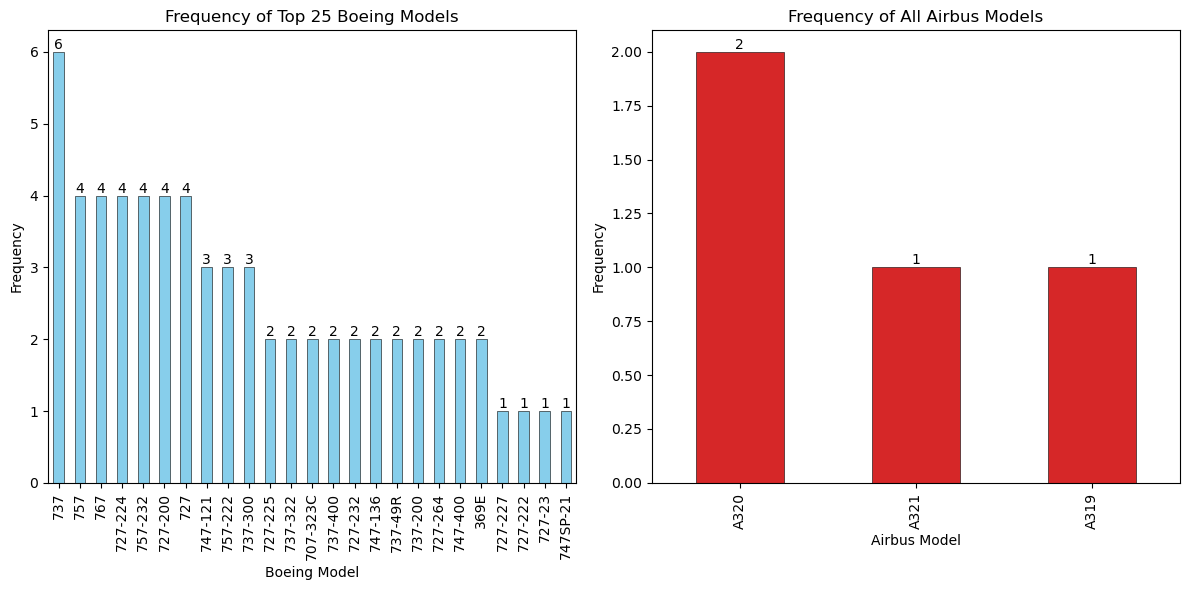

In [39]:
boeing_models = boeing['Model'].value_counts().sort_values(ascending = False).head(25)
airbus_models = airbus['Model'].value_counts().sort_values(ascending = False).head()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

boeing_models.plot(kind = 'bar',
                     ax = ax1,
                     edgecolor = 'k',
                     linewidth = 0.4,
                     color = 'skyblue')

ax1.set_title('Frequency of Top 25 Boeing Models')
ax1.set_xlabel('Boeing Model')
ax1.set_ylabel('Frequency')

airbus_models.plot(kind = 'bar',
                   ax = ax2,
                   edgecolor = 'k',
                   linewidth = 0.4,
                   color = 'tab:red')

ax2.set_title('Frequency of All Airbus Models')
ax2.set_xlabel('Airbus Model')
ax2.set_ylabel('Frequency')

for count in ax1.containers:
    labels = ax1.bar_label(count, label_type ='edge', fontsize = 10)

for count in ax2.containers:
    labels = ax2.bar_label(count, label_type ='edge', fontsize = 10)


plt.tight_layout()
plt.show()

After seeing the most frequent models in the dataset, I will visualize what types of engines each model has.

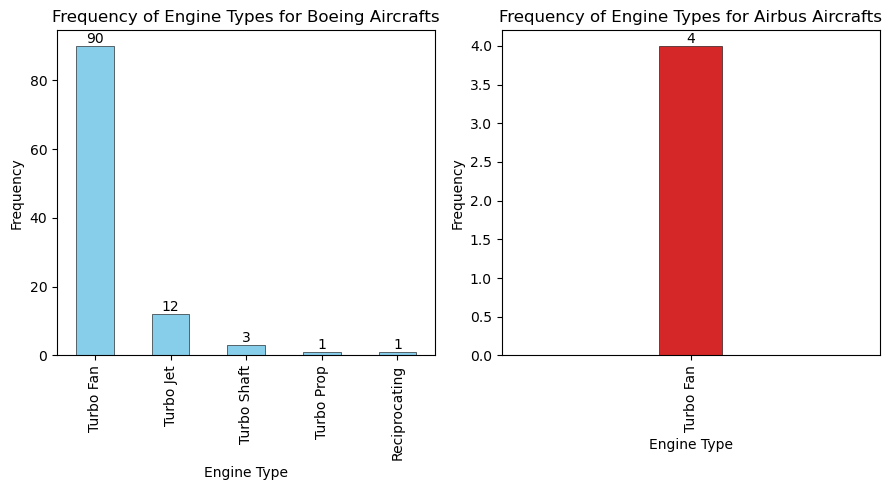

In [40]:
boeing_engines = boeing['Engine.Type'].value_counts()
airbus_engines = airbus['Engine.Type'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (9, 5))

boeing_engines.plot(kind = 'bar',
                    ax = ax1,
                    color = 'skyblue',
                    edgecolor = 'k',
                    linewidth = 0.4)

ax1.set_title('Frequency of Engine Types for Boeing Aircrafts')
ax1.set_xlabel('Engine Type')
ax1.set_ylabel('Frequency')

airbus_engines.plot(kind = 'bar',
                    ax = ax2,
                    width = 0.1,
                    color = 'tab:red',
                    edgecolor = 'k',
                    linewidth = 0.4)

ax2.set_title('Frequency of Engine Types for Airbus Aircrafts')
ax2.set_xlabel('Engine Type')
ax2.set_ylabel('Frequency')

for count in ax1.containers:
    labels = ax1.bar_label(count, label_type ='edge', fontsize = 10)

for count in ax2.containers:
    labels = ax2.bar_label(count, label_type ='edge', fontsize = 10)

plt.tight_layout()
plt.show()

There are a significant amount more Boeing records with Turbo Fan engines than there are Airbus. It looks like the Turbo Fan engine type is not the safest for Boeing models.

In [41]:
boeing = boeing[boeing['Engine.Type'] != 'Turbo Fan']
boeing

,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status
669,"MARANA, AZ",United States,Non-Fatal,Substantial,Boeing,707-123B,No,4.0,Turbo Jet,Ferry,0.0,0.0,0.0,7.0,Probable Cause
5726,NaN,Pakistan,Non-Fatal,Substantial,Boeing,747-121,No,4.0,<NA>,Unknown,0.0,0.0,0.0,245.0,Foreign
6545,"FRANKFORT, GERMANY",Germany,Non-Fatal,Substantial,Boeing,747-200F,No,4.0,<NA>,NaN,0.0,0.0,0.0,5.0,Foreign
16900,"LOS ANGELES, CA",United States,Non-Fatal,NaN,Boeing,727-224,No,3.0,Turbo Jet,Unknown,0.0,0.0,0.0,92.0,Probable Cause
17012,"CALGARY, CANADA",Canada,Non-Fatal,Substantial,Boeing,727-247,No,3.0,Turbo Jet,Unknown,0.0,0.0,0.0,71.0,Foreign
19470,"BOGOTA, COLOMBIA",Colombia,Non-Fatal,Substantial,Boeing,707-330C,No,4.0,<NA>,NaN,0.0,0.0,0.0,3.0,Foreign
22058,NaN,Hong Kong,Non-Fatal,Substantial,Boeing,747-124,No,4.0,<NA>,NaN,0.0,0.0,0.0,15.0,Foreign
27880,"WINDSOR LOCKS, CT",United States,Non-Fatal,Destroyed,Boeing,727-100QC,No,3.0,Turbo Jet,NaN,0.0,0.0,0.0,3.0,Probable Cause
28212,"DENVER, CO",United States,Non-Fatal,Substantial,Boeing,DHC-6-300,No,2.0,Turbo Prop,Business,0.0,0.0,0.0,2.0,Probable Cause
31838,"SAN LUIS, Argentina",Argentina,Non-Fatal,Destroyed,Boeing,737-200C,No,0.0,<NA>,Unknown,0.0,0.0,0.0,113.0,Foreign


I'm going to continue looking at the Boeing models, specifically those with Turbo Jet engines.

Similar to the visualization I created for Reciprocating engines, I am going to visualize the number of Turbo Jet engines that these Boeing models had.

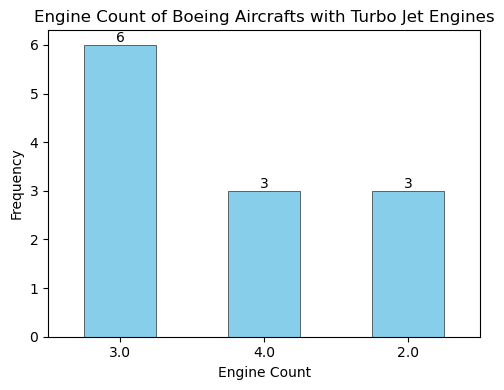

In [42]:
boeing_turbo_jet = boeing[(boeing['Engine.Type'] == 'Turbo Jet')]

boeing_turbo_jet_count = boeing_turbo_jet['Number.of.Engines'].value_counts()

fig, ax = plt.subplots(figsize = (5, 4))

boeing_turbo_jet_count.plot(kind = 'bar',
                            color = 'skyblue',
                            edgecolor = 'k',
                            linewidth = 0.4,
                            ax = ax)

ax.set_title('Engine Count of Boeing Aircrafts with Turbo Jet Engines')
ax.set_xlabel('Engine Count')
ax.set_ylabel('Frequency')
ax.set_xticklabels(boeing_turbo_jet_count.index, rotation = 360)

for count in ax.containers:
    labels = ax.bar_label(count, label_type ='edge', fontsize = 10)

plt.tight_layout()
plt.show()

In [43]:
boeing = boeing[~((boeing['Engine.Type'] == 'Turbo Jet') &
                  (boeing['Number.of.Engines'] < 4.0))]
boeing

,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status
669,"MARANA, AZ",United States,Non-Fatal,Substantial,Boeing,707-123B,No,4.0,Turbo Jet,Ferry,0.0,0.0,0.0,7.0,Probable Cause
5726,NaN,Pakistan,Non-Fatal,Substantial,Boeing,747-121,No,4.0,<NA>,Unknown,0.0,0.0,0.0,245.0,Foreign
6545,"FRANKFORT, GERMANY",Germany,Non-Fatal,Substantial,Boeing,747-200F,No,4.0,<NA>,NaN,0.0,0.0,0.0,5.0,Foreign
19470,"BOGOTA, COLOMBIA",Colombia,Non-Fatal,Substantial,Boeing,707-330C,No,4.0,<NA>,NaN,0.0,0.0,0.0,3.0,Foreign
22058,NaN,Hong Kong,Non-Fatal,Substantial,Boeing,747-124,No,4.0,<NA>,NaN,0.0,0.0,0.0,15.0,Foreign
28212,"DENVER, CO",United States,Non-Fatal,Substantial,Boeing,DHC-6-300,No,2.0,Turbo Prop,Business,0.0,0.0,0.0,2.0,Probable Cause
31838,"SAN LUIS, Argentina",Argentina,Non-Fatal,Destroyed,Boeing,737-200C,No,0.0,<NA>,Unknown,0.0,0.0,0.0,113.0,Foreign
36703,"BELLEVILLE, MI",United States,Non-Fatal,Substantial,Boeing,747-238B,No,4.0,Turbo Jet,Positioning,0.0,0.0,0.0,4.0,Probable Cause
38627,"FAYETTEVILLE, NC",United States,Non-Fatal,Substantial,Boeing,B-17G,No,4.0,Reciprocating,Business,0.0,0.0,0.0,3.0,Probable Cause
43360,"MESA, AZ",United States,Non-Fatal,Substantial,Boeing,MD600N,No,1.0,Turbo Shaft,Unknown,0.0,0.0,0.0,1.0,Probable Cause


Looks like there are still some records with <NA> values in the "Engine.Type" column. I am going to remove these.

In [44]:
boeing = boeing.dropna(subset=['Engine.Type'])
boeing

,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status
669,"MARANA, AZ",United States,Non-Fatal,Substantial,Boeing,707-123B,No,4.0,Turbo Jet,Ferry,0.0,0.0,0.0,7.0,Probable Cause
28212,"DENVER, CO",United States,Non-Fatal,Substantial,Boeing,DHC-6-300,No,2.0,Turbo Prop,Business,0.0,0.0,0.0,2.0,Probable Cause
36703,"BELLEVILLE, MI",United States,Non-Fatal,Substantial,Boeing,747-238B,No,4.0,Turbo Jet,Positioning,0.0,0.0,0.0,4.0,Probable Cause
38627,"FAYETTEVILLE, NC",United States,Non-Fatal,Substantial,Boeing,B-17G,No,4.0,Reciprocating,Business,0.0,0.0,0.0,3.0,Probable Cause
43360,"MESA, AZ",United States,Non-Fatal,Substantial,Boeing,MD600N,No,1.0,Turbo Shaft,Unknown,0.0,0.0,0.0,1.0,Probable Cause
44957,"MESA, AZ",United States,Non-Fatal,Substantial,Boeing,369E,No,1.0,Turbo Shaft,Instructional,0.0,0.0,0.0,2.0,Probable Cause
45337,"MIAMI, FL",United States,Non-Fatal,Substantial,Boeing,747-259B,No,4.0,Turbo Jet,NaN,0.0,0.0,0.0,4.0,Probable Cause
47532,"TAFT, CA",United States,Non-Fatal,Substantial,Boeing,369E,No,1.0,Turbo Shaft,Other Work Use,0.0,0.0,0.0,1.0,Probable Cause


Going to update the models DataFrames for each type of aircraft.

In [48]:
aircrafts = [boeing, airbus]
cleaned_df = pd.concat(aircrafts)
cleaned_df

,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status
669,"MARANA, AZ",United States,Non-Fatal,Substantial,Boeing,707-123B,No,4.0,Turbo Jet,Ferry,0.0,0.0,0.0,7.0,Probable Cause
28212,"DENVER, CO",United States,Non-Fatal,Substantial,Boeing,DHC-6-300,No,2.0,Turbo Prop,Business,0.0,0.0,0.0,2.0,Probable Cause
36703,"BELLEVILLE, MI",United States,Non-Fatal,Substantial,Boeing,747-238B,No,4.0,Turbo Jet,Positioning,0.0,0.0,0.0,4.0,Probable Cause
38627,"FAYETTEVILLE, NC",United States,Non-Fatal,Substantial,Boeing,B-17G,No,4.0,Reciprocating,Business,0.0,0.0,0.0,3.0,Probable Cause
43360,"MESA, AZ",United States,Non-Fatal,Substantial,Boeing,MD600N,No,1.0,Turbo Shaft,Unknown,0.0,0.0,0.0,1.0,Probable Cause
44957,"MESA, AZ",United States,Non-Fatal,Substantial,Boeing,369E,No,1.0,Turbo Shaft,Instructional,0.0,0.0,0.0,2.0,Probable Cause
45337,"MIAMI, FL",United States,Non-Fatal,Substantial,Boeing,747-259B,No,4.0,Turbo Jet,NaN,0.0,0.0,0.0,4.0,Probable Cause
47532,"TAFT, CA",United States,Non-Fatal,Substantial,Boeing,369E,No,1.0,Turbo Shaft,Other Work Use,0.0,0.0,0.0,1.0,Probable Cause
63991,"Newark, NJ",United States,Non-Fatal,NaN,Airbus,A320,No,2.0,Turbo Fan,NaN,0.0,0.0,0.0,107.0,a fault in the airplane's AC 1 electrical bus ...
69796,"New Orleans, LA",United States,Non-Fatal,Minor,Airbus,A320,No,2.0,Turbo Fan,NaN,0.0,0.0,0.0,109.0,the captain's failure to properly recognize an...


After making some broad and some more specific cuts to the dataset, I managed to narrow it down to 12 models that represent the least risky components of an aircraft.

I am going to create a CSV file from this new DataFrame. 

In [36]:
cleaned_df.to_csv('safe_crafts.csv')

## Analysis and Results/Recommendations
***

After investigating the dataset and searching for aircrafts that fulfilled a certain amount of criteria, I have identified the main components that my business should use to purchase and operate the aircrafts with the least amount of risk:

* Boeing
    * Turbo Jet engine
        * At least 4
    * Turbo Shaft engine
    * Turbo Prop engine
    * Reciprocating engine
        * At least 4
* Airbus
    * Turbo Fan engine
        * At least 2

The variables that I based my decisions on are:
* Non-Fatal injury severity
* Frequency of records with given engine type/count
* Injury count (i.e., Minor, Serious, etc.)

#### Engine Type and Number of Engines
***

During my investigation, I found that aircrafts with less than two Reciprocating engines got into the most accidents.

Below are the charts modeling the relationship between aviation accident frequency in planes with Reciprocating engines, as well as engine count for those planes. These are the same charts that I created earlier in the Data Preparation section.

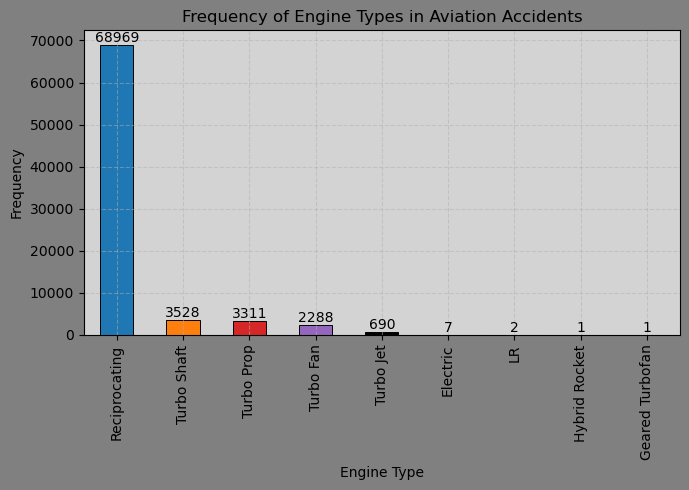

In [46]:
fig, ax = plt.subplots(figsize = (7, 5))
engine_type_frequency.plot(kind = 'bar', 
                    color = ['tab:blue', 'tab:orange', 'tab:red', 'tab:purple', 'k'], 
                    edgecolor = 'k', 
                    linewidth = 0.7, 
                    ax = ax)

fig.set_facecolor('grey')
ax.set_facecolor('lightgrey')

ax.set_xlabel('Engine Type')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Engine Types in Aviation Accidents')
ax.set_xticklabels(engine_type_frequency.index, rotation = 90)
plt.grid(True, linestyle = '--', alpha = 0.5)

for count in ax.containers:
    labels = ax.bar_label(count, label_type ='edge', fontsize = 10)

plt.tight_layout()
plt.show()

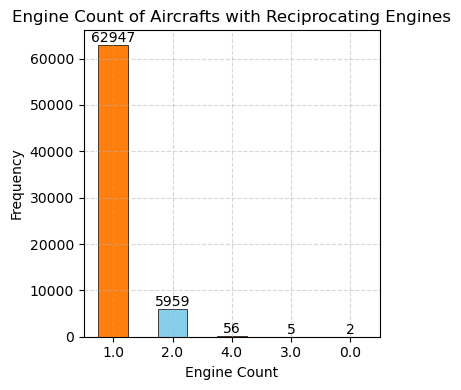

In [47]:
reciprocating = accidents[accidents['Engine.Type'] == 'Reciprocating']

reciprocating_count = reciprocating['Number.of.Engines'].value_counts()

fig, ax = plt.subplots(figsize = (4, 4))

reciprocating_count.plot(kind = 'bar',
                         color = ['tab:orange', 'skyblue'],
                         edgecolor = 'k',
                         linewidth = 0.5,
                         ax = ax)

ax.set_xlabel('Engine Count')
ax.set_ylabel('Frequency')
ax.set_title('Engine Count of Aircrafts with Reciprocating Engines')
ax.set_xticklabels(reciprocating_count.index, rotation = 360)
plt.grid(True, linestyle = '--', alpha = 0.5)

for count in ax.containers:
    labels = ax.bar_label(count, label_type ='edge', fontsize = 10)

plt.tight_layout()
plt.show()

These two charts allowed me to make a broad cut to exclude all aircrafts with less than two Reciprocating engines, since they make up a large portion of these records.

From here, I selected two makes of aircraft to focus on for my business. Seeing that I want to find aircrafts to operate for commercial enterprises, I found that Boeing and Airbus are two popular choices for this kind of business venture. 

## Conclusion and Next Steps
***

## Repo Structure
***